In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from IPython.display import display, HTML, IFrame


In [4]:
df = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/meses_producao_custo.csv')


In [5]:
df

,Meses,litros,custo
0,Jan,20200,19000
1,Fev,16700,17000
2,Mar,14800,14000
3,Abr,16000,15000
4,Mai,12100,14000
5,Jun,13000,15000
6,Jul,11600,13000
7,Ago,15500,16000
8,Set,18900,18000
9,Out,20000,19000


In [16]:
#calculando a correlação, usando regressão linear
df.corr(method='spearman') #valores muito proximos ao pearson

,litros,custo
litros,1.000000,0.970137
custo,0.970137,1.000000


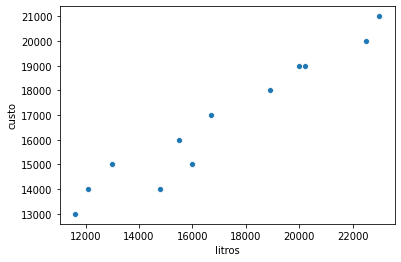

In [10]:
sns.scatterplot(df['litros'], df['custo'])
plt.show()

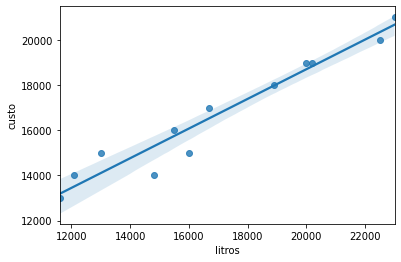

In [11]:
sns.regplot(df['litros'], df['custo'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


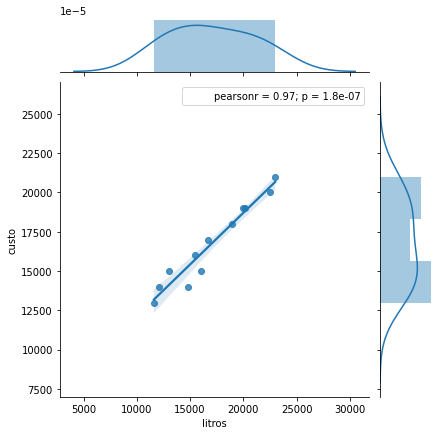

In [14]:
g = sns.jointplot(data=df, x ='litros', y='custo', kind='reg')
g.annotate(stats.pearsonr)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


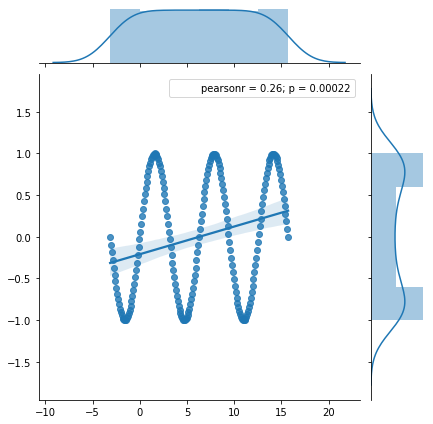

In [15]:
#exemplo aonde a correlação DE PEARSON não funciona
x = np.linspace(-np.pi, 5*np.pi, 201) #criando 200 pontos quem variam de -pi a pi
y = np.sin(x)
g = sns.jointplot(x=x, y=y, kind='reg')
g.annotate(stats.pearsonr)
plt.show()

In [17]:
#RELAÇÃO ENTRE VARIÁVEIS CATEGÓRICAS
df = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/titanic.csv')


In [19]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


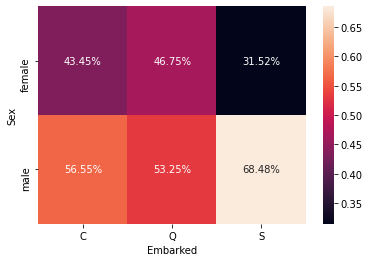

In [29]:
# existe relacao entre o porto de embarque para cada um dos sexos?
ctab = pd.crosstab(df['Sex'], df['Embarked'], normalize='columns')
sns.heatmap(ctab, annot=True, fmt='.2%')
plt.show()

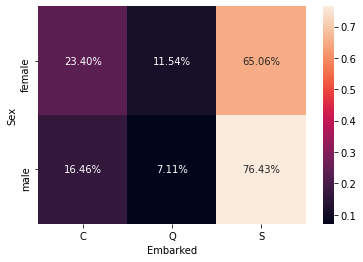

In [30]:
# existe relacao entre o porto de embarque para cada um dos sexos?
ctab = pd.crosstab(df['Sex'], df['Embarked'], normalize='index')
sns.heatmap(ctab, annot=True, fmt='.2%')
plt.show()

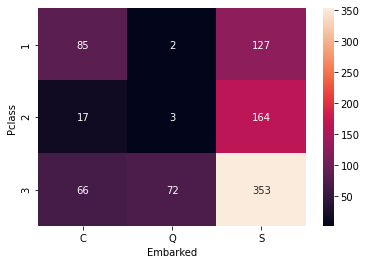

In [31]:
#Relacao entre Pclass e o porto
ctab = pd.crosstab(df['Pclass'], df['Embarked'])
sns.heatmap(ctab, annot=True, fmt='g')
plt.show()

In [32]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [33]:
df['Pclass'].isna().sum()

0

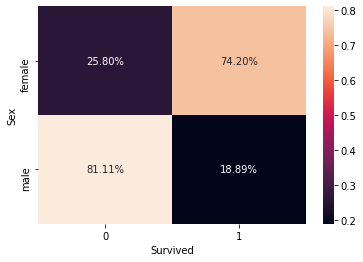

In [35]:
  #há relação entre sexo e sobrevivência?
  ctab = pd.crosstab(df['Sex'], df['Survived'], normalize='index')
  sns.heatmap(ctab, annot=True, fmt='.2%')
  plt.show() 

In [38]:
display(HTML('<h1 style="text-align: center; color: red"> Multicolinearidade </h1>'))

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [44]:
df = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/ommlbd_familiar.csv', na_values=-9999) 
#todos os valores menor que -9999, são inválidados, utilizando [na_values]


In [45]:
df.head(2)

,HS_CPF,QTDPESSOASCASA,MENORRENDACASA,MAIORRENDACASA,SOMARENDACASA,MEDIARENDACASA,MAIORIDADECASA,MENORIDADECASA,MEDIAIDADECASA,INDICMENORDEIDADE,COBRANCABAIXOCASA,COBRANCAMEDIOCASA,COBRANCAALTACASA,SEGMENTACAOFINBAIXACASA,SEGMENTACAOFINMEDIACASA,SEGMENTACAOALTACASA,BOLSAFAMILIACASA,FUNCIONARIOPUBLICOCASA
0,23325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,667198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df.corr()

,HS_CPF,QTDPESSOASCASA,MENORRENDACASA,MAIORRENDACASA,SOMARENDACASA,MEDIARENDACASA,MAIORIDADECASA,MENORIDADECASA,MEDIAIDADECASA,INDICMENORDEIDADE,COBRANCABAIXOCASA,COBRANCAMEDIOCASA,COBRANCAALTACASA,SEGMENTACAOFINBAIXACASA,SEGMENTACAOFINMEDIACASA,SEGMENTACAOALTACASA,BOLSAFAMILIACASA,FUNCIONARIOPUBLICOCASA
HS_CPF,1.000000,-0.014572,-0.016791,-0.018743,-0.018389,-0.018728,-0.014400,-0.014422,-0.014414,-0.014575,-0.014573,-0.014574,-0.014574,-0.014572,-0.014574,-0.014574,-0.014572,-0.014574
QTDPESSOASCASA,-0.014572,1.000000,0.987037,0.892697,0.863329,0.959613,0.999766,0.999766,0.999766,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
MENORRENDACASA,-0.016791,0.987037,1.000000,0.906628,0.887196,0.974987,0.986842,0.986872,0.986864,0.987041,0.987041,0.987041,0.987041,0.987041,0.987041,0.987041,0.987039,0.987042
MAIORRENDACASA,-0.018743,0.892697,0.906628,1.000000,0.980658,0.972949,0.892765,0.892683,0.892729,0.892693,0.892694,0.892693,0.892693,0.892693,0.892693,0.892693,0.892688,0.892698
SOMARENDACASA,-0.018389,0.863329,0.887196,0.980658,1.000000,0.953395,0.863486,0.863336,0.863405,0.863309,0.863310,0.863309,0.863309,0.863310,0.863309,0.863309,0.863304,0.863315
MEDIARENDACASA,-0.018728,0.959613,0.974987,0.972949,0.953395,1.000000,0.959548,0.959540,0.959555,0.959616,0.959617,0.959617,0.959617,0.959617,0.959617,0.959617,0.959613,0.959620
MAIORIDADECASA,-0.014400,0.999766,0.986842,0.892765,0.863486,0.959548,1.000000,0.999999,1.000000,0.999766,0.999766,0.999766,0.999766,0.999766,0.999766,0.999766,0.999766,0.999766
MENORIDADECASA,-0.014422,0.999766,0.986872,0.892683,0.863336,0.959540,0.999999,1.000000,1.000000,0.999766,0.999766,0.999766,0.999766,0.999766,0.999766,0.999766,0.999766,0.999766
MEDIAIDADECASA,-0.014414,0.999766,0.986864,0.892729,0.863405,0.959555,1.000000,1.000000,1.000000,0.999766,0.999766,0.999766,0.999766,0.999766,0.999766,0.999766,0.999766,0.999766
INDICMENORDEIDADE,-0.014575,1.000000,0.987041,0.892693,0.863309,0.959616,0.999766,0.999766,0.999766,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


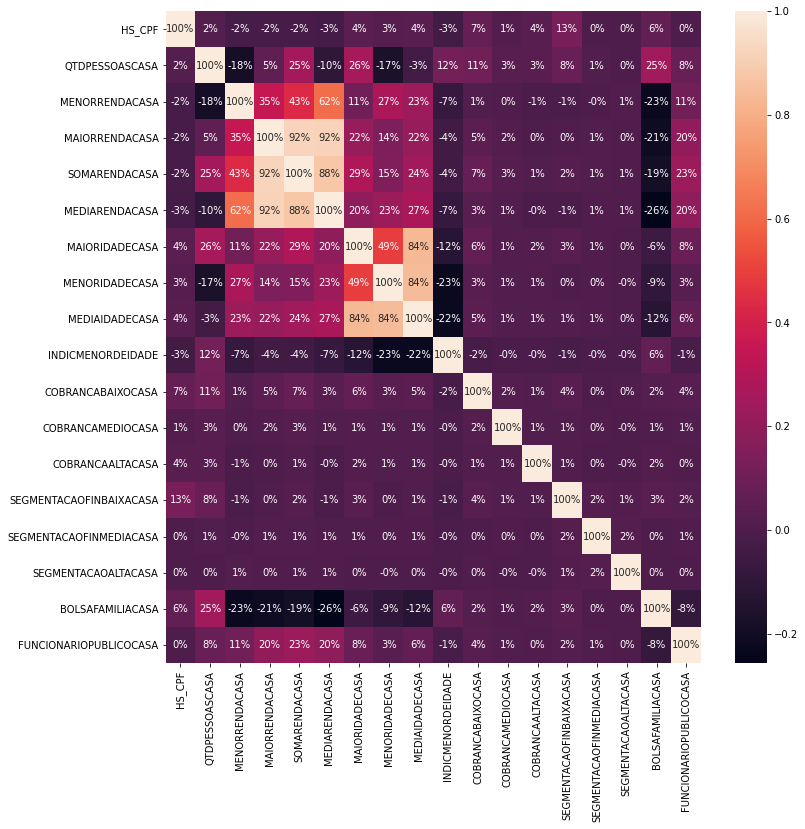

In [46]:
plt.rcParams['figure.figsize'] = (12, 12)
plt.rcParams['font.size'] = 10

cor = df.corr()
sns.heatmap(cor, annot=True, fmt='.0%')
plt.show()


In [47]:
#VIF
#Se o VIF = 1, significa que a variável não possui correlação com os demais
#Se o VIF > 5, então há uma correlação com várias outras váriaveis 

#Detalhe: o VIF só é calculado se não houverem valores faltantes


# Redes neurais, arvores de decisão, regressão logistíca -> se beneficiam de poucas variáveis correlacionadas entre si
# Enseambles -> random forest, xgboost: se beneficiam de variáveis correlacionadas(componente aleatória -> 'ignoram correlação alta entre atributos')


In [48]:
#imputação
# -> Substituir os valores faltantes pela média de cada coluna
df.fillna(df.mean(), inplace=True)

In [51]:
def calc_vif(tabela):
  vif = pd.DataFrame()
  vif['variaveis'] = tabela.columns
  vif['vif'] = [variance_inflation_factor(tabela.values, i) for i in range(tabela.shape[1]) ]

  return vif

In [52]:
calc_vif(df)
#Regressão logistica
#VIF -> não impacta o resultado da regressão logistica
#Mas, ao mesmo tempo, remover as variáveis com VIF alto, torna a equacao mais simples

,variaveis,vif
0,HS_CPF,3.412182
1,QTDPESSOASCASA,31.690786
2,MENORRENDACASA,9.118081
3,MAIORRENDACASA,54.022669
4,SOMARENDACASA,40.028290
5,MEDIARENDACASA,66.867885
6,MAIORIDADECASA,371.082940
7,MENORIDADECASA,121.033315
8,MEDIAIDADECASA,694.286178
9,INDICMENORDEIDADE,1.247177


In [53]:
#remoção da coluna com maior VIF
df.drop('MEDIAIDADECASA', axis=1, inplace= True)